In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
pip install WordCloud

     |████████████████████████████████| 163kB 1.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [ ]:
tickets_df = pd.read_csv('cleandata.csv')
print(tickets_df.shape)
tickets_df.head()

(8500, 12)


,Unnamed: 0,Short description,Description,Caller,Assignment group,short_desc_language,desc_language,FullDescription,CleanDescription,CleanWordCount,WordCount,LabelEncodings
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en,en,login issue -verified user details.(employee# ...,login issue verify user detail employee manage...,22,31,0
1,1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,et,en,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,outlook team meet skype appear calendar somebo...,12,24,0
2,2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,en,en,cant log in to vpn \r\n\r\nreceived from: eylq...,cant log vpn best,6,14,0
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en,en,unable to access hr_tool page unable to access...,unable access hr page,8,10,0
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,no,no,skype error skype error,skype error,4,4,0


In [ ]:
group_frequency = dict(tickets_df['Assignment group'].value_counts())
group_df = pd.DataFrame.from_dict(group_frequency, orient='index', columns=['frequency'])
group_df['percent representation'] = group_df['frequency'] / group_df['frequency'].sum()
group_df['cumulative percentage'] = group_df['percent representation'].cumsum(axis = 0)
group_df.head(35)

,frequency,percent representation,cumulative percentage
GRP_0,3975,0.469193,0.469193
GRP_8,661,0.078022,0.547214
GRP_24,289,0.034112,0.581327
GRP_12,257,0.030335,0.611662
GRP_9,252,0.029745,0.641407
GRP_2,241,0.028447,0.669854
GRP_19,215,0.025378,0.695231
GRP_3,200,0.023607,0.718839
GRP_6,184,0.021719,0.740557
GRP_13,145,0.017115,0.757672


In [ ]:
group_frequency_filtered = dict(filter(lambda x: x[1] > 28, group_frequency.items()))

In [ ]:
print (group_frequency_filtered)

{'GRP_0': 3975, 'GRP_8': 661, 'GRP_24': 289, 'GRP_12': 257, 'GRP_9': 252, 'GRP_2': 241, 'GRP_19': 215, 'GRP_3': 200, 'GRP_6': 184, 'GRP_13': 145, 'GRP_10': 140, 'GRP_5': 129, 'GRP_14': 118, 'GRP_25': 116, 'GRP_33': 107, 'GRP_4': 100, 'GRP_29': 97, 'GRP_18': 88, 'GRP_16': 85, 'GRP_17': 81, 'GRP_7': 68, 'GRP_31': 67, 'GRP_34': 62, 'GRP_26': 56, 'GRP_40': 45, 'GRP_28': 44, 'GRP_41': 40, 'GRP_15': 39, 'GRP_42': 37, 'GRP_20': 36, 'GRP_45': 35, 'GRP_22': 31, 'GRP_1': 31, 'GRP_11': 30, 'GRP_21': 29}


In [ ]:
#Lets now filter the data frame and retain only the necessary groups(Filtered)
valid_grp_list = list(group_frequency_filtered)

In [ ]:
tickets_df = tickets_df[tickets_df['CleanDescription'].notna()]
clean_tickets_df = tickets_df.groupby(['LabelEncodings']).filter(lambda x: len(x) > 28)


In [ ]:
#high word count incidents are mostly security incidents
tickets_df[tickets_df.CleanWordCount > tickets_df.CleanWordCount.max()-200]

,Unnamed: 0,Short description,Description,Caller,Assignment group,short_desc_language,desc_language,FullDescription,CleanDescription,CleanWordCount,WordCount,LabelEncodings
4087,4087,security incidents - ( sw #in33895560 ) : mage...,"source ip : 172.20.10.37 , 208.211.136.158\nsy...",ugyothfz ugrmkdhx,GRP_39,en,en,security incidents - ( sw #in33895560 ) : mage...,security incident magento sql injection source...,789,1409,33
4089,4089,security incidents - ( sw #in33895560 ) : mage...,"source ip : 172.20.10.37 , 208.211.136.158\nsy...",ugyothfz ugrmkdhx,GRP_2,en,en,security incidents - ( sw #in33895560 ) : mage...,security incident magento sql injection source...,789,1408,12
5092,5092,security incidents - ( #in33578632) : suspicio...,source ip: 29.26.13.3095\r\nsource hostname: H...,gzhapcld fdigznbk,GRP_3,en,en,security incidents - ( #in33578632) : suspicio...,security incident suspicious rpc d netbios act...,714,958,23
7345,7345,security incidents - ( sw #in33501789 ) : broa...,we are seeing activity indicating the host at ...,ugyothfz ugrmkdhx,GRP_2,en,en,security incidents - ( sw #in33501789 ) : broa...,security incident broadscanning possible vulne...,868,1431,12
7647,7647,security incidents - ( #in33578632) : suspicio...,source ip :\r\nsystem name :\r\nuser name:\r\...,gzhapcld fdigznbk,GRP_2,en,en,security incidents - ( #in33578632) : suspicio...,security incident suspicious rpc d netbios act...,732,897,12
7982,7982,security incidents - ( dsw #in33390850 ) : sus...,source ip : 78.83.16.293\nsystem name : HostNa...,ugyothfz ugrmkdhx,GRP_2,en,en,security incidents - ( dsw #in33390850 ) : sus...,security incident dsw suspicious rpc d netbios...,767,1027,12
7984,7984,security incidents - ( dsw #in33390850 ) : sus...,source ip : 78.83.16.293\r\nsystem name : Host...,ugyothfz ugrmkdhx,GRP_12,en,en,security incidents - ( dsw #in33390850 ) : sus...,security incident dsw suspicious rpc d netbios...,767,1027,4
7997,7997,security incidents - ( sw #in33544563 ) : poss...,source ip : 45.25.35.0499\nsystem name : lpal9...,ugyothfz ugrmkdhx,GRP_2,en,en,security incidents - ( sw #in33544563 ) : poss...,lpal source system user sbinuxja vtbegcho nico...,768,1303,12
8002,8002,security incidents - ( sw #in33544563 ) : poss...,source ip : 45.25.35.0499\r\nsystem name : lpa...,ugyothfz ugrmkdhx,GRP_62,en,en,security incidents - ( sw #in33544563 ) : poss...,lpal source system user sbinuxja vtbegcho nico...,768,1303,59


In [ ]:
tickets_df.CleanWordCount.max()

868

In [ ]:
le = preprocessing.LabelEncoder()
clean_tickets_df["LabelEncodings"] = le.fit_transform(clean_tickets_df["Assignment group"])
y = clean_tickets_df['LabelEncodings']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
y.value_counts()

0     3975
33     661
16     289
4      257
34     252
12     241
11     215
21     200
31     184
5      145
2      140
30     129
6      118
17     116
23     107
25     100
20      97
10      88
8       85
9       81
32      68
22      67
24      62
18      56
26      45
19      44
27      40
7       39
28      37
13      36
29      35
15      31
1       31
3       30
14      29
Name: LabelEncodings, dtype: int64

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(clean_tickets_df['CleanDescription'], y, test_size=0.3, random_state=102, stratify=clean_tickets_df['LabelEncodings'])

In [ ]:
pip install nlpaug

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('omw')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sagardahiya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw to /Users/sagardahiya/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sagardahiya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sagardahiya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

In [ ]:
# 0 and 72
newdataset = pd.DataFrame({'CleanDescription': train_x,
                    'LabelEncoding': train_y})

In [ ]:
newdatasetSynonymnWithoutL1L2 = newdataset[(newdataset["LabelEncoding"]!= 0) & (newdataset["LabelEncoding"]!= 72)]
newdatasetAntonymWithoutL1L2 = newdatasetSynonymnWithoutL1L2
newdatasetSynonymnWithoutL1L2.shape

(2909, 2)

In [ ]:
aug = naw.SynonymAug(aug_src='wordnet')
for index, row in newdatasetSynonymnWithoutL1L2.iterrows():
    newdatasetSynonymnWithoutL1L2.loc[index, 'CleanDescription'] = aug.augment(row.CleanDescription)
  

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
aug = naw.AntonymAug()
for index, row in newdatasetAntonymWithoutL1L2.iterrows():
    newdatasetAntonymWithoutL1L2.loc[index, 'CleanDescription'] = aug.augment(row.CleanDescription)

In [ ]:
newframe = [newdataset,newdatasetSynonymnWithoutL1L2,newdatasetAntonymWithoutL1L2]

clean_tickets_df = pd.concat(newframe)

In [ ]:
clean_tickets_df.head()

,CleanDescription,LabelEncoding
7478,abend job jobscheduler abended scheduler,20
7570,window account lock ad,0
1049,reset password soldfnbq uhnbsvqd use management,9
5923,ticket update inplant,0
4915,job sid hotf fail scheduler,30


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted',zero_division=0,)             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted',zero_division=0)
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted',zero_division=0)
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

In [ ]:
from keras.preprocessing.text import Tokenizer
# The maximum number of words to be used
MAX_NB_WORDS = 50000
# Max number of words in ticket
MAX_SEQUENCE_LENGTH = 868
# This is fixed.
EMBEDDING_DIM = 300
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(clean_tickets_df['CleanDescription'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 11077 unique tokens.


In [ ]:
from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(clean_tickets_df['CleanDescription'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (11509, 868)


In [ ]:
test_x =tokenizer.texts_to_sequences(test_x)

In [ ]:
test_x = pad_sequences(test_x, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
print('Shape of data tensor:', test_x.shape)

Shape of data tensor: (2439, 868)


In [ ]:
test_y = pd.get_dummies(test_y)

In [ ]:
Y = pd.get_dummies(clean_tickets_df["LabelEncoding"]).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (11509, 35)


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)

(10358, 868) (10358, 35)
(1151, 868) (1151, 35)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,SpatialDropout1D,LSTM
from keras.callbacks import EarlyStopping 

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(35, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs,validation_data=(X_val,Y_val), batch_size=batch_size,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10358 samples, validate on 1151 samples
Epoch 1/20
10358/10358 [==============================] - 211s 20ms/step - loss: 2.5180 - accuracy: 0.3604 - val_loss: 1.9443 - val_accuracy: 0.4648
Epoch 2/20
10358/10358 [==============================] - 196s 19ms/step - loss: 1.5100 - accuracy: 0.5829 - val_loss: 1.1951 - val_accuracy: 0.6490
Epoch 3/20
10358/10358 [==============================] - 197s 19ms/step - loss: 0.9003 - accuracy: 0.7489 - val_loss: 0.8198 - val_accuracy: 0.7663
Epoch 4/20
10358/10358 [==============================] - 196s 19ms/step - loss: 0.5621 - accuracy: 0.8499 - val_loss: 0.6263 - val_accuracy: 0.8115
Epoch 5/20
10358/10358 [==============================] - 197s 19ms/step - loss: 0.3980 - accuracy: 0.8913 - val_loss: 0.5593 - val_accuracy: 0.8349
Epoch 6/20
10358/10358 [==============================] - 197s 19ms/step - loss: 0.3202 - accuracy: 0.9042 - val_loss: 0.5100 - val_accuracy: 0.8436
Epoch 7/20
10358/10358 [==============================] -

In [ ]:
accr = model.evaluate(test_x,test_y)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2439/2439 [==============================] - 14s 6ms/step
Test set
  Loss: 1.846
  Accuracy: 0.651


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
yhat_probs = model.predict(test_x, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(test_x, verbose=0)

In [ ]:
test_y

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
3122,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
749,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3183,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3681,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
testy_inverset = np.argmax(test_y, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_y, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y, yhat_classes, average='weighted')
print('Precision: %f' % precision)
recall = recall_score(test_y, yhat_classes, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(test_y, yhat_classes, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.651497
Precision: 0.633940
Recall: 0.651497
F1 score: 0.632274


In [ ]:
compare_results = pd.DataFrame(columns=['Algorithm Name', 'Accuracy','Precision','Recall' ,'F1 Score'])

In [ ]:
compare_results = compare_results.append({'Algorithm Name': 'LSTM-DataAug','Accuracy':accuracy,'Precision':precision,'Recall':recall, 'F1 Score': f1}, ignore_index=True)

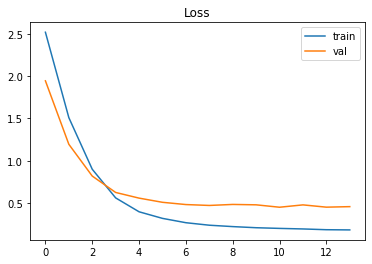

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show();

In [ ]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

## Model using Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
x = clean_tickets_df['CleanDescription']
y = clean_tickets_df['LabelEncoding']

In [ ]:
def create_bag_of_words(X):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = 'english', ngram_range = (1,3), max_features = 10000) 
    train_data_features = vectorizer.fit_transform(X)
    train_data_features = train_data_features.toarray()
    
    # tfidf transform
    from sklearn.feature_extraction.text import TfidfTransformer
    tfidf = TfidfTransformer()
    tfidf_features = tfidf.fit_transform(train_data_features).toarray()

    # Get words in the vocabulary
    vocab = vectorizer.get_feature_names()

      
    return vectorizer, vocab, train_data_features, tfidf_features, tfidf

In [ ]:
vectorizer, vocab, train_data_features, tfidf_features, tfidf  =  create_bag_of_words(x)

In [ ]:
def train_logistic_regression(features, label):
    print ("Training the logistic regression model...")
    from sklearn.linear_model import LogisticRegression
    ml_model = LogisticRegression(C = 100,random_state = 0)
    ml_model.fit(features, label)
    print ('Finished')
    return ml_model

In [ ]:
ml_model = train_logistic_regression(tfidf_features, y)

Training the logistic regression model...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.


Finished


In [ ]:
test_data_features = vectorizer.transform(test_x)
# Convert to numpy array
test_data_features = test_data_features.toarray()
test_data_tfidf_features = tfidf.fit_transform(test_data_features)

# Convert to numpy array
test_data_tfidf_features = test_data_tfidf_features.toarray()

In [ ]:
predicted_train_y = ml_model.predict(tfidf_features)
correctly_identified_train_y = predicted_train_y == y
accuracy = np.mean(correctly_identified_train_y) * 100
print ('Training Accuracy = %.0f%%' %accuracy)

Training Accuracy = 94%


In [ ]:
predicted_y = ml_model.predict(test_data_tfidf_features)
correctly_identified_y = predicted_y == test_y
accuracy = np.mean(correctly_identified_y) * 100
print ('Test Accuracy = %.0f%%' %accuracy)

Test Accuracy = 69%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predicted_y, target_names=valid_grp_list))

              precision    recall  f1-score   support

       GRP_0       0.79      0.90      0.84      1193
       GRP_8       0.33      0.22      0.27         9
      GRP_24       0.79      0.64      0.71        42
      GRP_12       0.50      0.11      0.18         9
       GRP_9       0.61      0.56      0.59        77
       GRP_2       0.58      0.68      0.62        44
      GRP_19       0.65      0.31      0.42        35
       GRP_3       0.80      0.33      0.47        12
       GRP_6       0.25      0.08      0.12        26
      GRP_13       0.95      0.88      0.91        24
      GRP_10       0.61      0.42      0.50        26
       GRP_5       0.36      0.31      0.33        65
      GRP_14       0.57      0.68      0.62        72
      GRP_25       0.50      0.09      0.15        11
      GRP_33       1.00      0.11      0.20         9
       GRP_4       0.60      0.33      0.43         9
      GRP_29       0.92      0.75      0.82        87
      GRP_18       0.65    